# **Decision Trees**


In [1]:
# Import modules and libraries

import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
np.random.seed(1234)

## Iris dataset

The Iris is a classical machine learning dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set), composed of Iris plants. 
The iris samples in question fall into three species: Iris setosa, Iris versicolor, and Iris virginica. The objective is to classify plants based on the lengths and widths of their petals and sepals


In [9]:
# Import the dataset using the sklearn library
from sklearn import datasets
data_url = 'https://github.com/abdelrahman-ayad/MiCM-introML-W21/raw/main/notebooks/Data/IrisDataset.csv'
dataset = pd.read_csv(data_url)

# Display the first ten rows of dataset
dataset.head(10)


,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [4]:
# Assign features and targets (labels) from the dataset
y = dataset['target']
x = dataset[dataset.columns.drop('target')]

In [5]:
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
print ("number of instances (Dataset size):", num_instances)
print ("number of features:", num_features)
print ("number of classes:", num_classes)

number of instances (Dataset size): 150
number of features: 2
number of classes: 3


In [6]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # 70% training and 30% test
print("Training set size:", x_train.shape, y_train.shape)
print("Testing set size:", x_test.shape, y_test.shape)

Training set size: (105, 2) (105,)
Testing set size: (45, 2) (45,)


accuracy is 66.7.


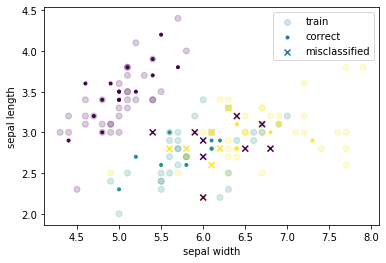

In [7]:
# Create a DT model 
DTmodel = DecisionTreeClassifier(criterion = 'gini', max_depth=10)

# We fit the model with train data
DTmodel.fit(x_train, y_train)

# Make the predictions for test part
y_pred = DTmodel.predict(x_test)

# Compare prediction with actual y_test to get accuracy
correct = y_test == y_pred
incorrect = np.logical_not(correct)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#Plot the results
plt.scatter(x_train['sepal length'], x_train['sepal width'], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test['sepal length'].loc[correct], x_test['sepal width'].loc[correct], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test['sepal length'].loc[incorrect], x_test['sepal width'].loc[incorrect], marker='x', c=y_test[incorrect], label='misclassified')
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.legend()
plt.show()
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

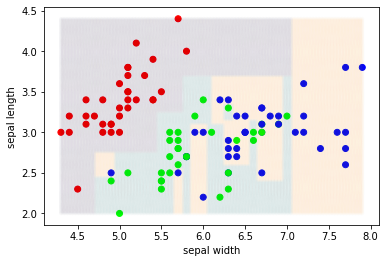

In [8]:
#Plot boundaries of the decision tree model
x0v = np.linspace(np.min(x['sepal length']), np.max(x_train['sepal length']), 200)
x1v = np.linspace(np.min(x['sepal width']), np.max(x_train['sepal width']), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
y_train_prob = np.zeros((y_train.shape[0], num_classes))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = DTmodel.fit(x_train, y_train).predict(x_all)

plt.scatter(x_train['sepal length'], x_train['sepal width'], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.show()

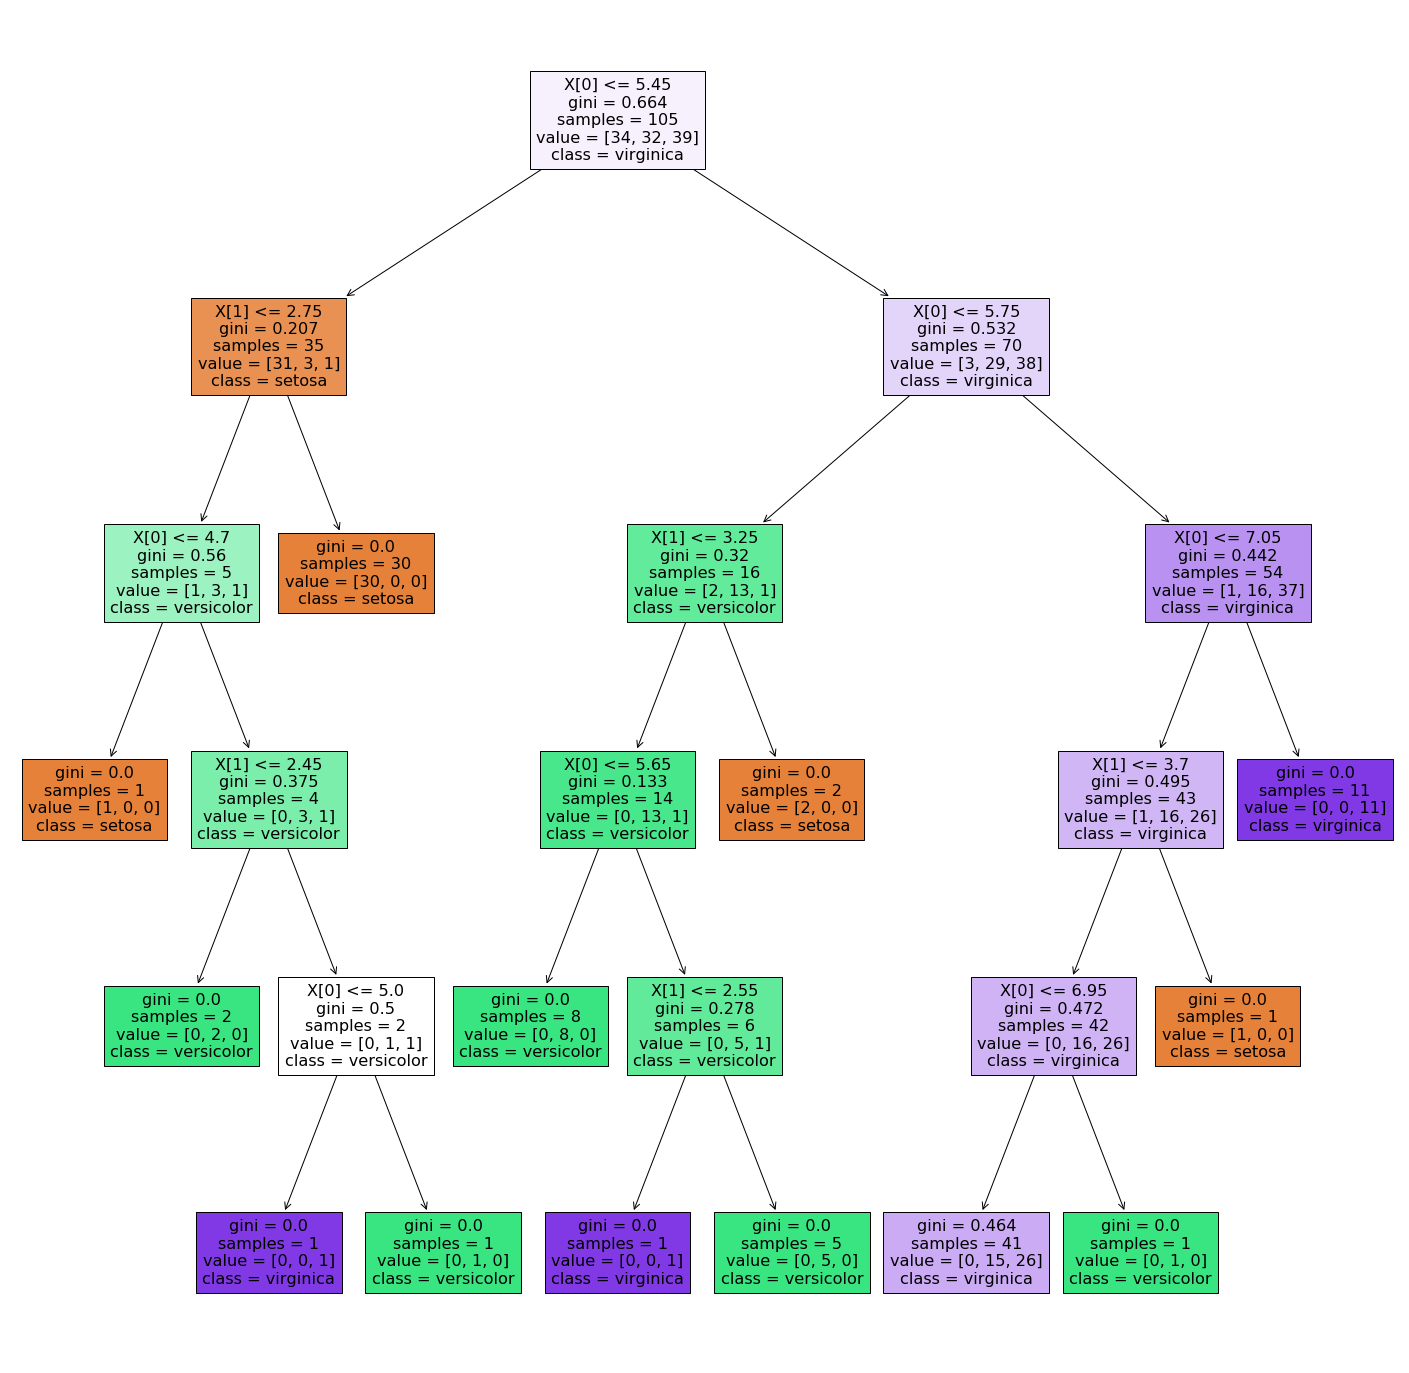

In [94]:
# Visualize the tree
plt.figure(figsize = (25,25))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model, filled=True, class_names=['setosa', 'versicolor', 'virginica'])
plt.show()